In [37]:
import cv2
import numpy as np
from skimage import color
from matplotlib import pyplot as plt
from skimage import io, color, filters, util
import matplotlib.pyplot as plt


In [38]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import os


c:\users\jeremia delviero\appdata\local\programs\python\python37\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


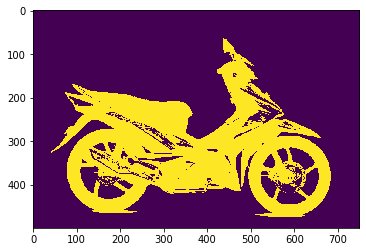

c:\users\jeremia delviero\appdata\local\programs\python\python37\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
c:\users\jeremia delviero\appdata\local\programs\python\python37\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


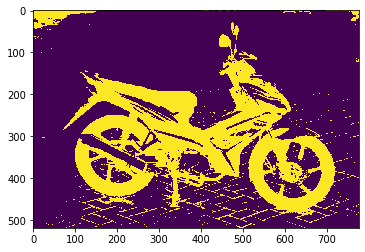

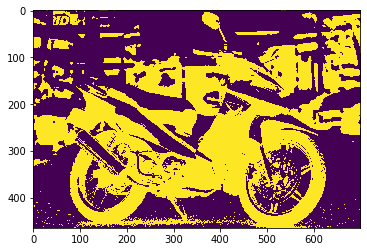

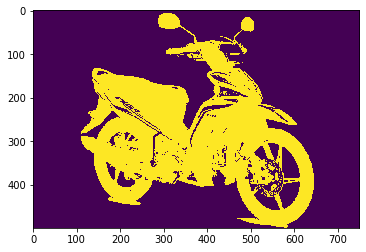

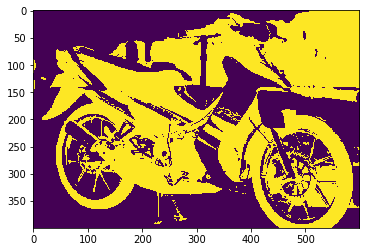

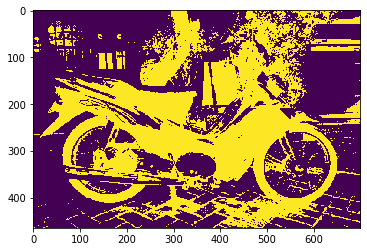

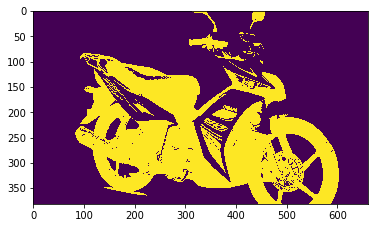

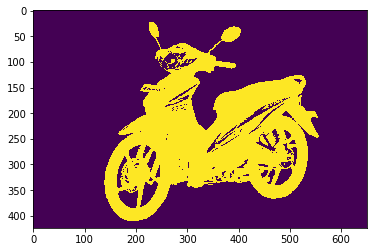

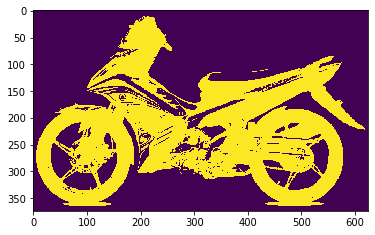

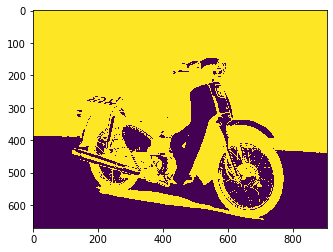

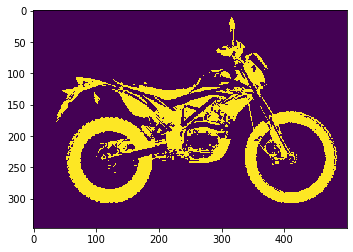

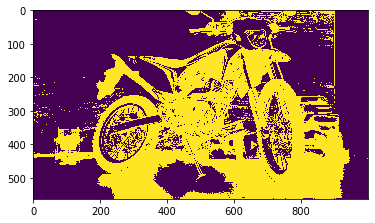

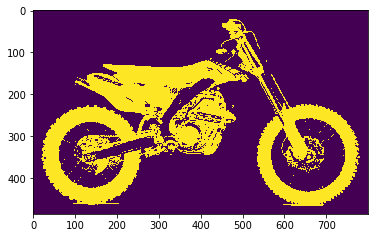

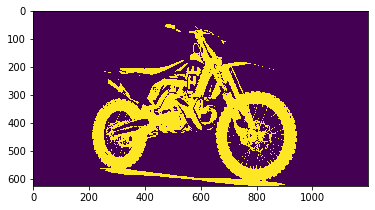

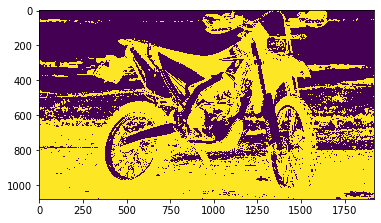

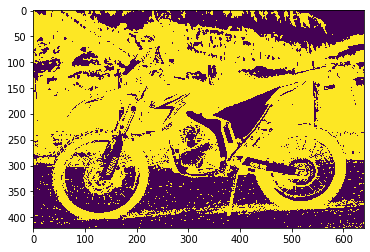

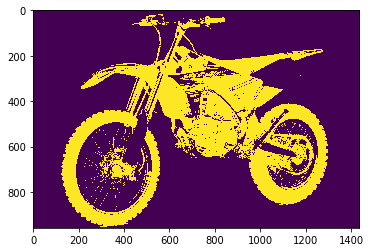

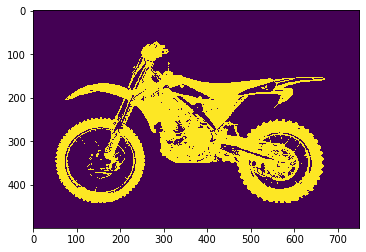

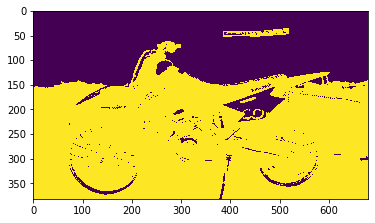

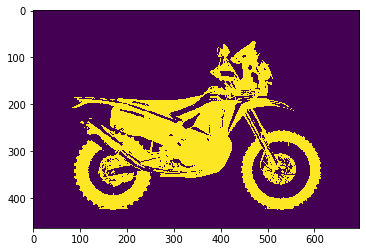

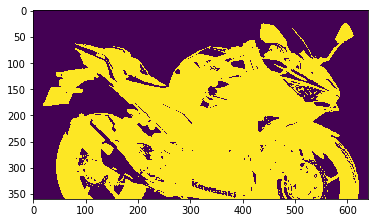

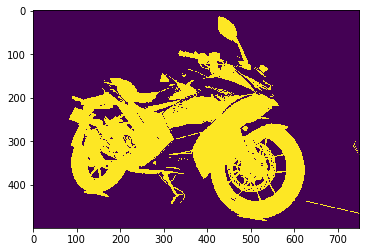

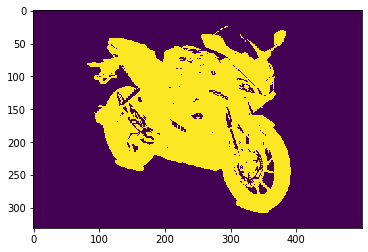

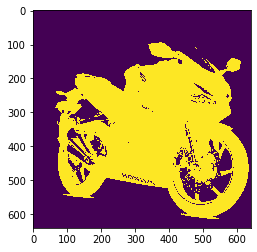

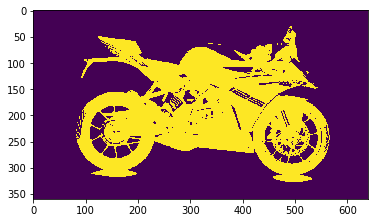

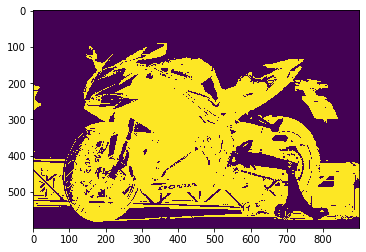

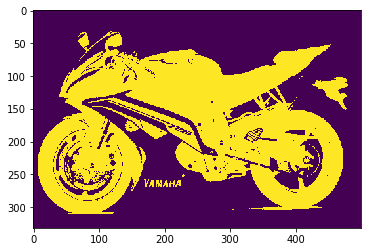

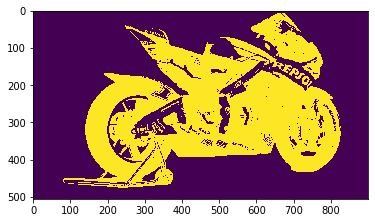

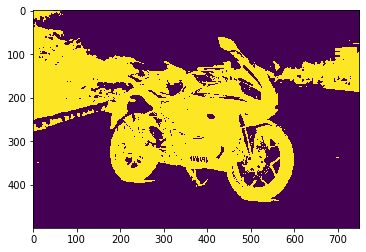

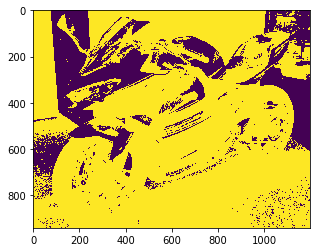

In [45]:
from skimage import measure, io, img_as_bool
import numpy as np
import glob
from cv2 import Sobel

files = glob.glob("Dataset/Motor/Train/*-i/*.jpg")
train_shape_feature = np.zeros((30,7))
for k in range(len(files)):
    BW1 = io.imread(files[k])
    G = util.img_as_ubyte(color.rgb2gray(BW1))
    T = filters.threshold_otsu(G)
    S = util.img_as_float(G < T)
    plt.imshow(S)
    plt.show()
#     img = np.float32(BW1) / 255.0 
#     gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
#     gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
#     mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    sf = measure.regionprops(S.astype(int))
    shape_feature = [max(s.equivalent_diameter for s in sf),
    max(s.perimeter for s in sf),
    max(s.area for s in sf),
    max(s.filled_area for s in sf),
    max(s.convex_area for s in sf),
    max(s.eccentricity for s in sf),
    max(s.orientation for s in sf),]
    train_shape_feature[k,:] = shape_feature
np.savetxt('train_shape_feature.csv', train_shape_feature, delimiter=',', fmt='%f')

files = glob.glob("Dataset/Motor/Test/*-i/*.jpg")
test_shape_feature = np.zeros((15,7))
for k in range(len(files)):
    BW1 = io.imread(files[k])
    G = util.img_as_ubyte(color.rgb2gray(BW1))
    T = filters.threshold_otsu(G)
    S = util.img_as_float(G < T)
#     img = np.float32(BW1) / 255.0 
#     gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
#     gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
#     mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    sf = measure.regionprops(S.astype(int))
    shape_feature = [max(s.equivalent_diameter for s in sf),
    max(s.perimeter for s in sf),
    max(s.area for s in sf),
    max(s.filled_area for s in sf),
    max(s.convex_area for s in sf),
    max(s.eccentricity for s in sf),
    max(s.orientation for s in sf)]
    test_shape_feature[k,:] = shape_feature
np.savetxt('test_shape_feature.csv', test_shape_feature, delimiter=',', fmt='%f')

In [46]:
from sklearn import svm, metrics, neighbors

def accuracy(actual,predicted):
    """This function evaluates the performance of a classification model
    by calculating the Accuracy
    actual = Column matrix with actual class labels of the training
    examples
    predicted = Column matrix with predicted class labels by the
    classification model
    Output: Row matrix with all the performance measures"""
    p = np.count_nonzero(actual == 1)
    n = np.count_nonzero(actual != 1)
    N = p + n
    tp= sum((int(actual[i] == 1 and predicted[i] == 1) for i in range(len(actual))))
    tn = sum((int(actual[i] != 1 and predicted[i] != 1) for i in range(len(actual))))
    fp = n - tn
    fn = p - tp
    accuracy = (tp + tn) / N
    return accuracy

train_label = np.ones((30,1))
train_label[10:20] = 2
train_label[20:] = 3

test_label = np.ones((15,1))
test_label[5:10] = 2
test_label[10:]

train_shape_feature=np.genfromtxt('train_shape_feature.csv',delimiter=',')
test_shape_feature=np.genfromtxt('test_shape_feature.csv',delimiter=',')
 
clf = neighbors.KNeighborsClassifier(7)
clf.fit(train_shape_feature, train_label)
svm_label = clf.predict(test_shape_feature)
print(svm_label, test_label)
cm_svm = metrics.confusion_matrix(svm_label, test_label)
print(cm_svm)

accuracy = accuracy(test_label,svm_label)
print("Akurasi: %f" % (accuracy))
# clf = neighbors.KNeighborsClassifier(7)
# clf.fit(train_shape_feature, train_label)
# svm_label = clf.predict(test_shape_feature)
# cm_svm = metrics.confusion_matrix(svm_label, test_label)
# print(cm_svm)

# eval_svm = evaluate(test_label,svm_label)
# accuracy = eval_svm[0]*100
# sensitivity = eval_svm[1]*100
# specificity = eval_svm[2]*100
# precision = eval_svm[3]*100
# recall = eval_svm[4]*100
# f_measure = eval_svm[5]*100
# print("Akurasi: %f" % (accuracy))
# print("Sensitivity: %f" % (sensitivity))
# print("Specificity: %f" % (specificity))
# print("Precision: %f" % (precision))
# print("Recall: %f" % (recall))
# print("f_measure: %f" % (f_measure))



[2. 1. 3. 3. 3. 3. 1. 1. 3. 3. 3. 2. 2. 3. 3.] [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[1 2 0]
 [3 0 0]
 [6 3 0]]
Akurasi: 26.666667
Sensitivity: 10.000000
Specificity: 60.000000
Precision: 33.333333
Recall: 10.000000
f_measure: 15.384615


c:\users\jeremia delviero\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [34]:
## coba-coba aja SVM
from sklearn import svm, metrics

train_label = np.ones((30,1))
train_label[15:,0] = 2
test_label = np.ones((14,1))
test_label[7:,0] = 2
train_shape_feature=np.genfromtxt('train_shape_feature.csv',delimiter=',')
test_shape_feature=np.genfromtxt('test_shape_feature.csv',delimiter=',')
clf = svm.SVC(gamma='scale')
print(clf)
clf.fit(train_shape_feature, train_label)
svm_label = clf.predict(test_shape_feature)
cm_svm = metrics.confusion_matrix(svm_label, test_label)

print(cm_svm)

accuracy = accuracy(test_label,svm_label)
print("Akurasi: %f" % (accuracy))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[3 4]
 [4 3]]
Akurasi: 42.857143
Sensitivity: 42.857143
Specificity: 42.857143
Precision: 42.857143
Recall: 42.857143
f_measure: 42.857143


c:\users\jeremia delviero\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
